<a href="https://colab.research.google.com/github/utkarshbelkhede/LeastSquare/blob/master/notebook/LeastSquare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. Loading required Libraries

In [65]:
import numpy as np               # Linear Algebra
import pandas as pd              # Data Handling
import seaborn as sns            # Visualization
import matplotlib.pyplot as plt  # Visualization
from datetime import date        # Use Year
import warnings                  # For warnings
warnings.filterwarnings('ignore')

#### 2. Importing dataset into 'cars' dataframe

In [66]:
cars = pd.read_csv("../datasets/Cars24.csv")
cars.head()

,Title,cvakb,cvakb1,bvr0c,bvr0c2,bvr0c3,_7udzz,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2020 KIA SELTOS,GTX + AT PETROL Automatic,Automatic,"8,241 km",1st Owner,Petrol,"?18,95,199",NaN,NaN,NaN,NaN,NaN,NaN
1,2020 Maruti Swift,LXI Manual,Manual,"10,568 km",1st Owner,Petrol,"?5,92,499",NaN,NaN,NaN,NaN,NaN,NaN
2,2019 Maruti Swift,LXI Manual,Manual,"27,659 km",1st Owner,Petrol,"?5,33,399",NaN,NaN,NaN,NaN,NaN,NaN
3,2020 KIA SELTOS,HTX 1.5 PETROL MT Manual,Manual,"32,799 km",1st Owner,Petrol,"?13,83,099",NaN,NaN,NaN,NaN,NaN,NaN
4,2014 Mercedes Benz C Class,C 200 AVANTGARDE Automatic,Automatic,"37,531 km",1st Owner,Petrol,"?20,33,499",NaN,NaN,NaN,NaN,NaN,NaN


#### 3. Feature Engineering

In [67]:
# To Perform Regex Operation
import re 


def find_number(text):
    """
    Extracts integers from text. 
    Returns a string of Numbers.

    Parameters :
    -----------
    text: string
    """

    num = re.findall(r'[0-9]+',text)
    return "".join(num)


def feature_engineering(cars):
    """
    Does Feature Engineering.
    And Returns a Clean Dataframe.

    Parameters :
    -----------
    cars: pandas.DataFrame - DataFrame on which you wish to perform Feature Engineering.
    """

    # First seven columns are relevant
    cars = cars.iloc[:,:7]

    # Giving Proper names to features
    cars.rename(columns = {'Title':'Name', 'cvakb':'Variant', 'cvakb1':'Transmission', 'bvr0c':'km_driven', 'bvr0c2':'Owner_Type', 'bvr0c3':'Fuel', '_7udzz':'Price'}, inplace = True)

    # Extracting only numbers
    cars["Price"] = cars["Price"].apply(lambda x: find_number(x))

    # Extracting year of purchase from Name
    cars['Year_Purchased'] = [' '.join(x.split(' ')[0:1]) for x in cars['Name']]

    # Extracting name excluding year of purchase
    cars['Company'] = [' '.join(x.split(' ')[1:2]) for x in cars['Name']]

    cars['Car'] = [' '.join(x.split(' ')[2:]) for x in cars['Name']]

    # Removing "km"
    cars["km_driven"] = cars["km_driven"].str.split().str.slice(start=0,stop=1).str.join(' ')

    # Extracting only numbers
    cars["km_driven"] = cars["km_driven"].apply(lambda x: find_number(x))

    # Removing Transmission type from the end of Variant
    cars['Variant'] = [' '.join(x.split(' ')[:-1]) for x in cars['Variant']]

    # Converting features to int
    cars = cars.astype({"km_driven":"int","Price":"int", "Year_Purchased":"int"})

    # Deriving Age of Vehical from Year of Purchase
    cars["Age"] = date.today().year - cars["Year_Purchased"]
    cars.drop(['Year_Purchased', 'Name'], axis=1, inplace=True)

    return cars

In [68]:
cars = feature_engineering(cars)
cars

,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Company,Car,Age
0,GTX + AT PETROL,Automatic,8241,1st Owner,Petrol,1895199,KIA,SELTOS,2
1,LXI,Manual,10568,1st Owner,Petrol,592499,Maruti,Swift,2
2,LXI,Manual,27659,1st Owner,Petrol,533399,Maruti,Swift,3
3,HTX 1.5 PETROL MT,Manual,32799,1st Owner,Petrol,1383099,KIA,SELTOS,2
4,C 200 AVANTGARDE,Automatic,37531,1st Owner,Petrol,2033499,Mercedes,Benz C Class,8
...,...,...,...,...,...,...,...,...,...
651,RXL EASY R 1.0 L,NaN,15795,1st Owner,Petrol,797799,Renault,Kiger,1
652,VXI OPT,Manual,48136,1st Owner,Petrol,372999,Maruti,Alto K10,5
653,MAGNA 1.1 IRDE2,Manual,45657,1st Owner,Petrol,350999,Hyundai,i10,7
654,XZ 1.2 REVOTRON,Manual,649,1st Owner,Petrol,731399,Tata,TIGOR,1


In [69]:
cars.head()

,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Company,Car,Age
0,GTX + AT PETROL,Automatic,8241,1st Owner,Petrol,1895199,KIA,SELTOS,2
1,LXI,Manual,10568,1st Owner,Petrol,592499,Maruti,Swift,2
2,LXI,Manual,27659,1st Owner,Petrol,533399,Maruti,Swift,3
3,HTX 1.5 PETROL MT,Manual,32799,1st Owner,Petrol,1383099,KIA,SELTOS,2
4,C 200 AVANTGARDE,Automatic,37531,1st Owner,Petrol,2033499,Mercedes,Benz C Class,8


#### 4. Description of Dataset

##### 4.1 Shape of Dataset

In [70]:
shape = cars.shape
print(f"There are \033[1m {shape[0]} rows\patterns \033[0m and \033[1m{shape[1]} features\033[0m.")

There are  656 rows\patterns  and 9 features.


##### 4.2 info

In [71]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Variant       656 non-null    object
 1   Transmission  632 non-null    object
 2   km_driven     656 non-null    int32 
 3   Owner_Type    656 non-null    object
 4   Fuel          656 non-null    object
 5   Price         656 non-null    int32 
 6   Company       656 non-null    object
 7   Car           656 non-null    object
 8   Age           656 non-null    int32 
dtypes: int32(3), object(6)
memory usage: 38.6+ KB


##### 4.3 Missing Values for features

In [72]:
[[features,cars[features].isnull().sum()] for features in cars.columns if cars[features].isnull().sum()>0]

[['Transmission', 24]]

##### 4.4 Heat Map for Missing Values

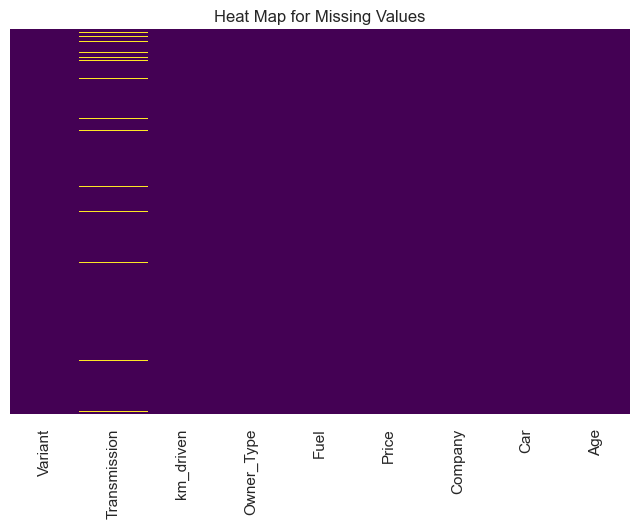

In [73]:
fig = sns.set(rc={'figure.figsize': (8, 5)})
plt.title("Heat Map for Missing Values")
sns.heatmap(cars.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

##### 4.5 Dropping NA values

In [74]:
cars.dropna(inplace=True)

Approximately, **3% values are Na**. Therefore, to simplify things, we dropped them.

##### 4.6 Saving Clean Dataframe

In [75]:
# For Further Use, saving the dataframe to csv
cars.to_csv("../datasets/clean_car.csv")

#### 5. Exploratory Data Analysis

##### 5.1.1. Type of Owner and Number of Cars

In [76]:
cars['Owner_Type'].value_counts()

1st Owner    504
2nd Owner    123
3rd Owner      5
Name: Owner_Type, dtype: int64

##### 5.1.2. Countplot Owner Type Vs Number of Cars

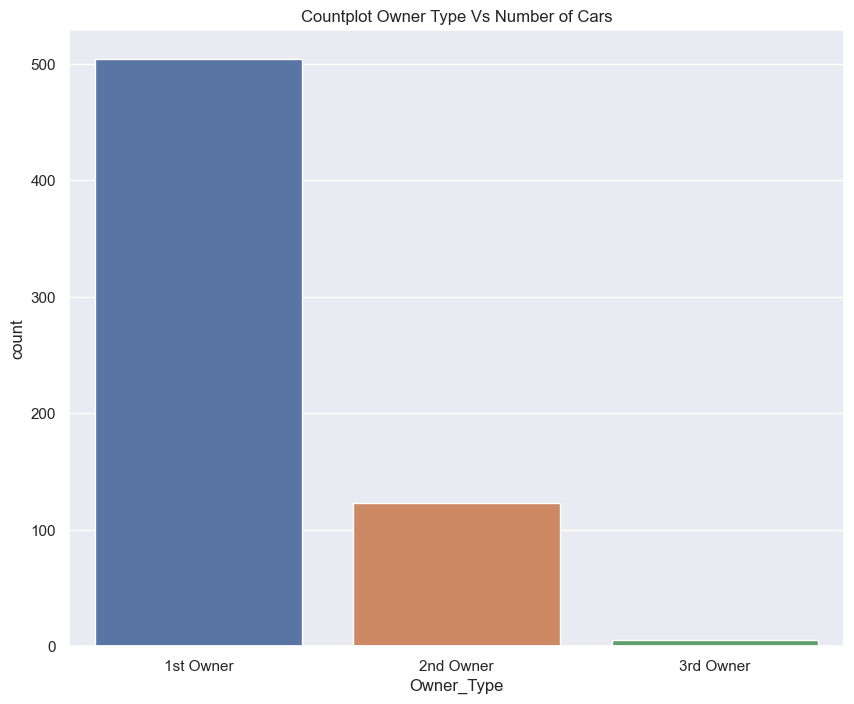

In [77]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Countplot Owner Type Vs Number of Cars")
sns.countplot(x ='Owner_Type', data = cars)
plt.show()

**Observation**

**First Owned Cars** are **highest among all**.

##### 5.1.4. Pie Chart Type of Owner Vs Number of cars.

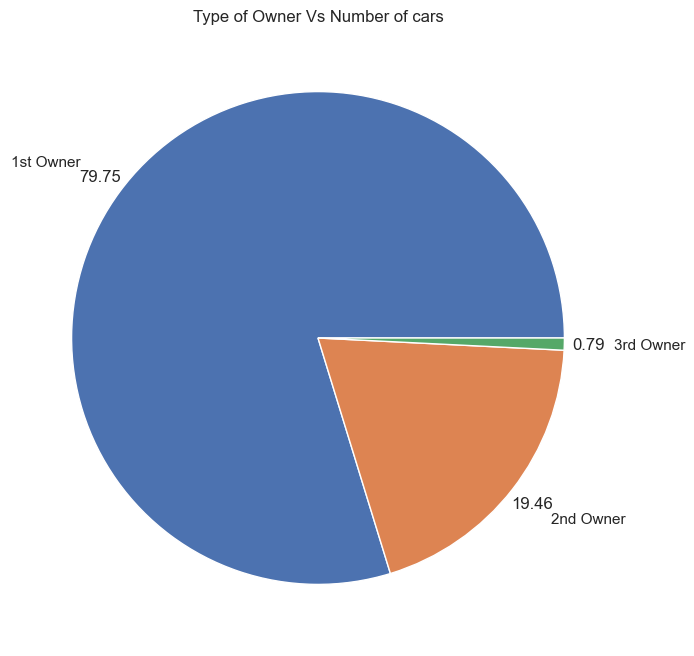

In [78]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Type of Owner Vs Number of cars")
plt.pie(cars['Owner_Type'].value_counts(),labels=cars['Owner_Type'].unique(),pctdistance=1.1, labeldistance=1.2,autopct='%.2f')
plt.show()

**Observation**

1. **79.75 %** of cars are **First Owned**.
2. **19.46 %** of cars are **Second Owned**.
3. **0.79 %** of cars are **Third Owned**.

##### 5.2. Barplot Owner Type Vs Selling Price

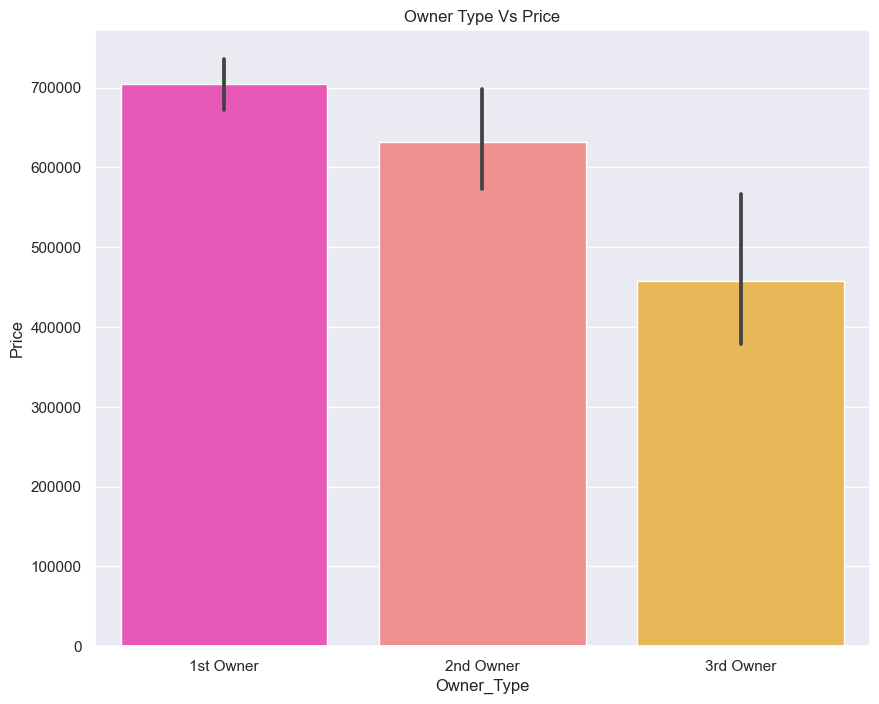

In [79]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Owner Type Vs Price")
sns.barplot(x='Owner_Type',y='Price',data=cars,palette='spring')
plt.show()

**Observation**

**First Owner cars** have **high average selling price**. 

As **number of owners** increases the **selling price** of car **decreases**.

##### 5.3.1. Automatic Vs Manual

In [80]:
cars['Transmission'].unique()

array(['Automatic', 'Manual', 'AUTOMATIC'], dtype=object)

In [81]:
cars['Transmission'] = np.where(cars['Transmission'] == 'AUTOMATIC', 'Automatic', cars['Transmission'])

In [82]:
cars['Transmission'].value_counts()

Manual       515
Automatic    117
Name: Transmission, dtype: int64

##### 5.3.2. Countplot Transmission Vs Number of Cars

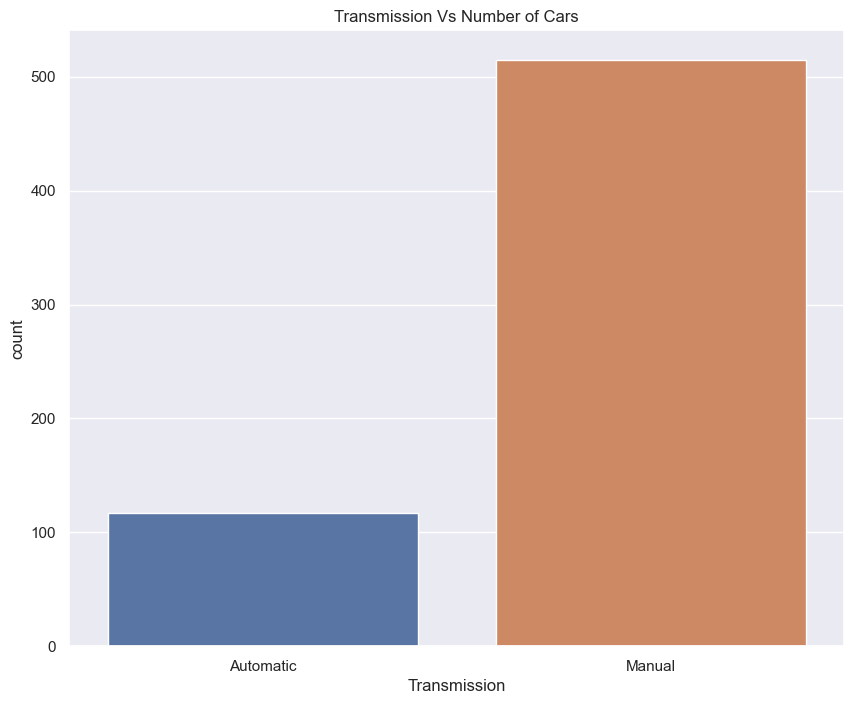

In [83]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Transmission Vs Number of Cars")
sns.countplot(x ='Transmission', data = cars)
plt.show()

**Observation**

Most of the cars are **Manual**.

##### 5.4. Barplot Transmission Vs Selling Price

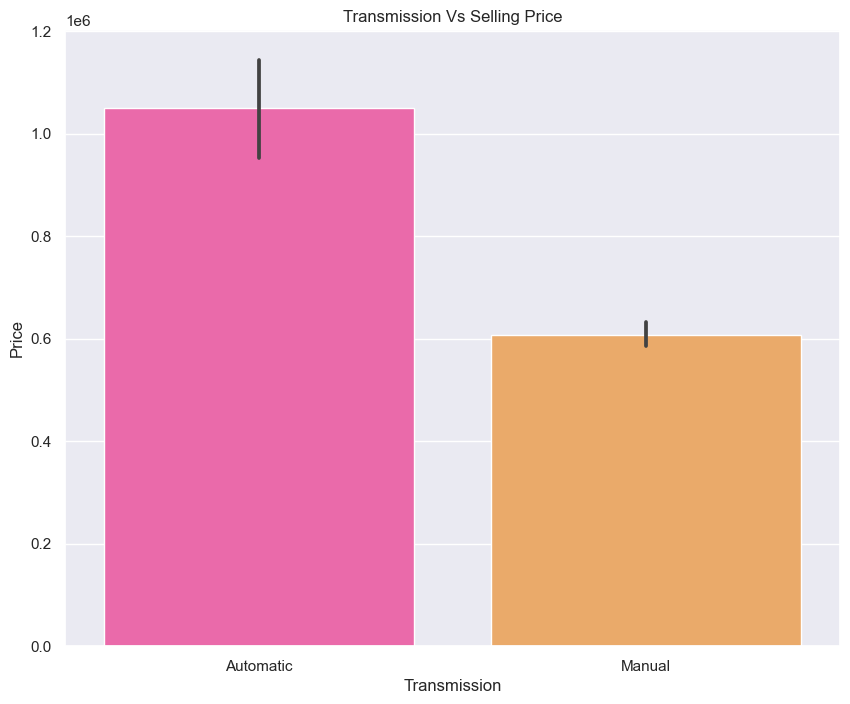

In [84]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Transmission Vs Selling Price")
sns.barplot(x='Transmission',y='Price',data=cars,palette='spring')
plt.show()

**Observation**

Cars having **Automatic Transmission have high selling price**.

##### 5.5. Countplot Fuel Vs Number of Cars

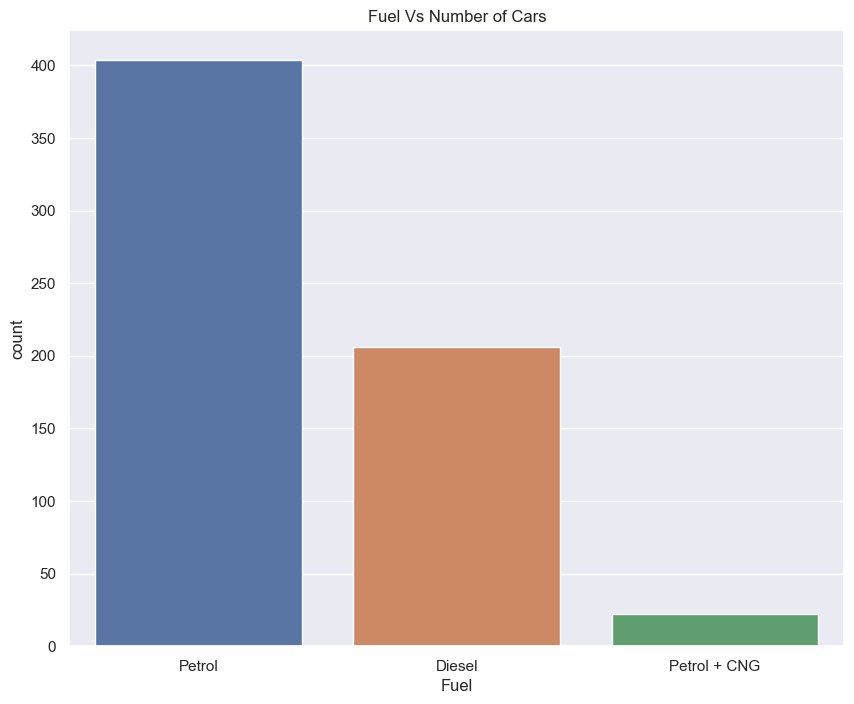

In [85]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Fuel Vs Number of Cars")
sns.countplot(x ='Fuel', data = cars)
plt.show()

**Observation**

Most of the cars are **Petrol**.

##### 5.6. Barplot Fuel Vs Selling Price

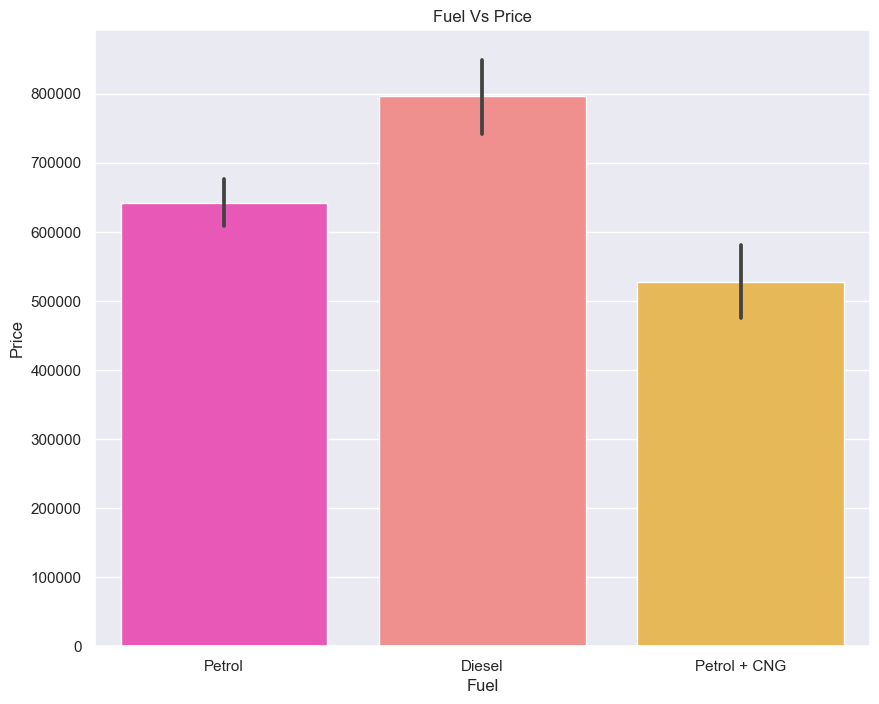

In [86]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Fuel Vs Price")
sns.barplot(x='Fuel',y='Price',data=cars,palette='spring')
plt.show()

**Observation**

**Diesel cars** have **high average selling price**.

##### 5.7. Age Vs Price

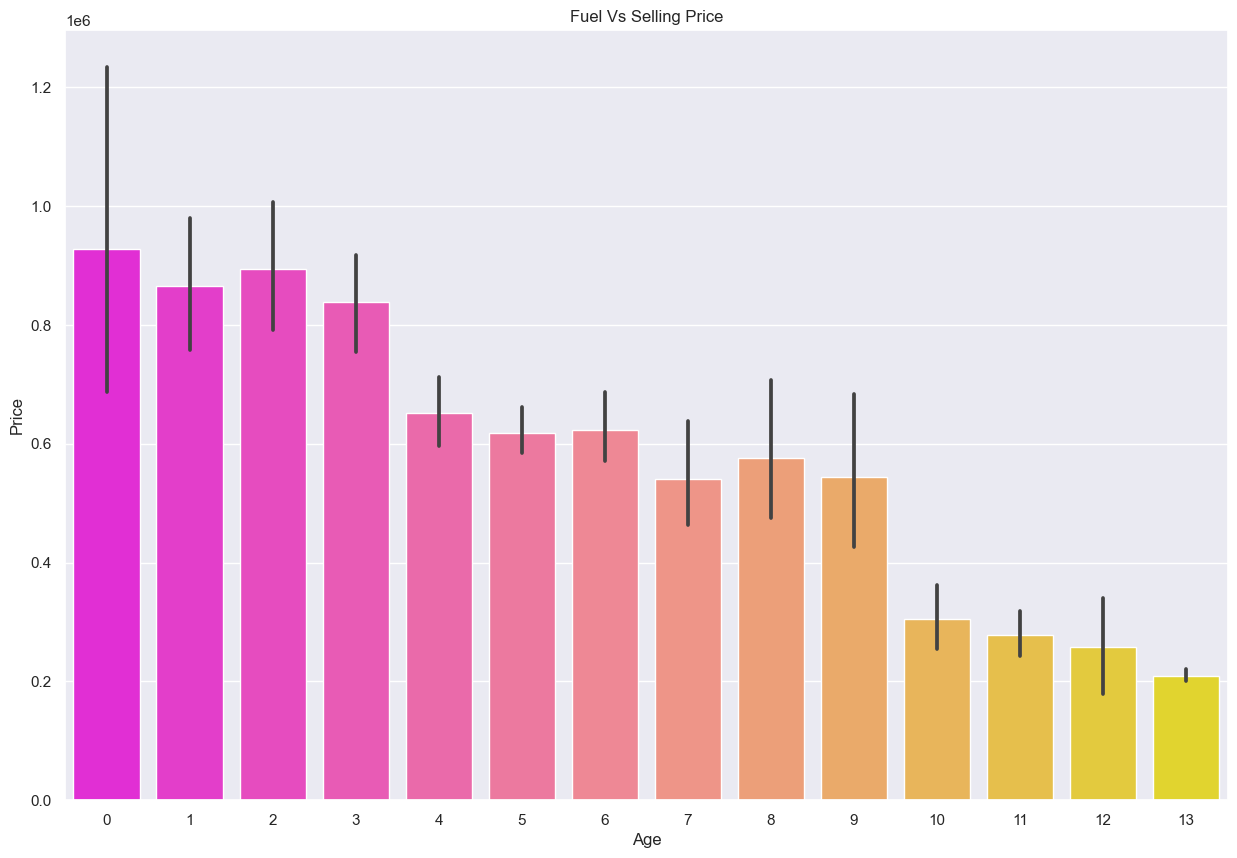

In [87]:
fig = sns.set(rc={'figure.figsize': (15, 10)})
plt.title("Fuel Vs Selling Price")
sns.barplot(x ='Age', y="Price", data = cars ,palette='spring')
plt.show()

**Observation**

As the age of Vehical increases, Price Decreases.

#### 6. Adjusting Target Value

##### 6.1 Skewness

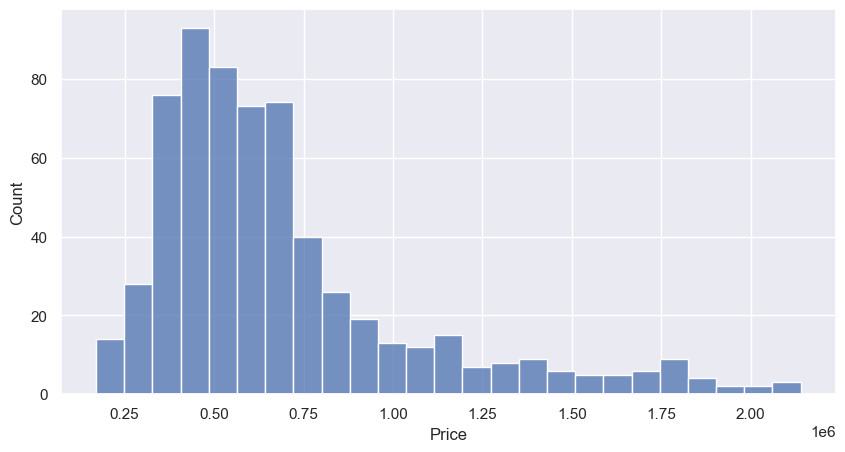

Mode 525,199.00
Median 589,549.00
Mean 688,814.91


In [88]:
fig = sns.set(rc={'figure.figsize': (10, 5)})
sns.histplot(cars['Price'])
plt.show()

print(f"\033[1mMode\033[0m {cars['Price'].mode()[0]:,.2f}")
print(f"\033[1mMedian\033[0m {cars['Price'].median():,.2f}")
print(f"\033[1mMean\033[0m {cars['Price'].mean():,.2f}")

**Observation**

Positively Skewed

<center><img src="../images/Skewness.jpeg" width=700px/></center>

##### 6.2 Outliers

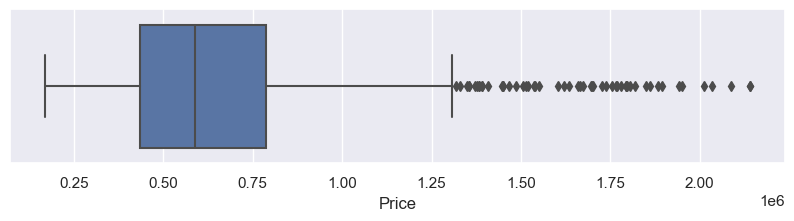

In [89]:
fig = sns.set(rc={'figure.figsize': (10, 2)})
sns.boxplot(x=cars['Price'])
plt.show()

**Observation**

As we can see, there are more than one outliers in the feature **Price**.

<center><img src="../images/Boxplot.png" width=700px/></center>

In [90]:
cars['zscore'] = (cars['Price'] - cars['Price'].mean()) / cars['Price'].std()
cars.head()

,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Company,Car,Age,zscore
0,GTX + AT PETROL,Automatic,8241,1st Owner,Petrol,1895199,KIA,SELTOS,2,3.225112
1,LXI,Manual,10568,1st Owner,Petrol,592499,Maruti,Swift,2,-0.257488
2,LXI,Manual,27659,1st Owner,Petrol,533399,Maruti,Swift,3,-0.415484
3,HTX 1.5 PETROL MT,Manual,32799,1st Owner,Petrol,1383099,KIA,SELTOS,2,1.856079
4,C 200 AVANTGARDE,Automatic,37531,1st Owner,Petrol,2033499,Mercedes,Benz C Class,8,3.594840


In [91]:
outliers = cars[(cars['zscore'] < -3) | (cars['zscore'] > 3)]
outliers.head()

,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Company,Car,Age,zscore
0,GTX + AT PETROL,Automatic,8241,1st Owner,Petrol,1895199,KIA,SELTOS,2,3.225112
4,C 200 AVANTGARDE,Automatic,37531,1st Owner,Petrol,2033499,Mercedes,Benz C Class,8,3.594840
34,SHARP HYBRID PETROL,Manual,12185,2nd Owner,Petrol,1848299,MG,HECTOR PLUS,2,3.099731
37,1.4 LONGITUDE (O) AT,Automatic,23327,1st Owner,Petrol,2012799,Jeep,Compass,3,3.539501
38,2.0 LIMITED,Manual,46860,1st Owner,Diesel,1941699,Jeep,Compass,3,3.349424


In [92]:
outliers.shape

(12, 10)

In [93]:
cars = cars[(cars['zscore'] > -3) & (cars['zscore'] < 3)]
cars.head()

,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Company,Car,Age,zscore
1,LXI,Manual,10568,1st Owner,Petrol,592499,Maruti,Swift,2,-0.257488
2,LXI,Manual,27659,1st Owner,Petrol,533399,Maruti,Swift,3,-0.415484
3,HTX 1.5 PETROL MT,Manual,32799,1st Owner,Petrol,1383099,KIA,SELTOS,2,1.856079
6,ERA 1.1 IRDE,Manual,37928,1st Owner,Petrol,271699,Hyundai,i10,9,-1.115106
7,VX MT PETROL,Manual,61168,2nd Owner,Petrol,658499,Honda,City,8,-0.081046


In [94]:
del cars["zscore"]

##### 6.1. Splitting Data into X and y

In [95]:
X = cars.drop(columns =['Price'])
y = cars['Price']

##### 6.2. Importing libraries for model fitting

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

##### 6.3. Pipeline

##### 6.3.1. One Hot Encoding

In [97]:
ohe = OneHotEncoder()
ohe.fit(X[['Company', 'Car','Variant','Transmission','Owner_Type','Fuel']])

OneHotEncoder()

In [98]:
column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_),['Company', 'Car','Variant','Transmission','Owner_Type','Fuel']),
    remainder='passthrough'
)

##### 6.3.2. Standard Scaler

In [99]:
scaler = StandardScaler(with_mean=False)

##### 6.3.3. Regression Models

In [100]:
# Linear Regression
lr = LinearRegression()

# Alpha values
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

# Ridge and Lasso
ridge = Ridge(alpha=0.001)
lasso = Lasso(alpha=0.001)

**Hyper Parameters**

1. fit_intercept : bool, default=True
If set to False, no intercept will be used in calculations.

2. normalize : bool, default=False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. 

3. copy_X : bool, default=True
If True, X will be copied; else, it may be overwritten.

4. n_jobs : int, default=None
The number of jobs to use for the computation. 

5. positive : bool, default=False
When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

##### 6.3.4. Pipeline Structure

In [101]:
pipe = make_pipeline(column_trans, scaler, lr)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi', 'BMW', 'Datsun', 'Ford', 'Honda', 'Hyundai', 'Jaguar',
       'Jeep', 'KIA', 'MG', 'Mahindra', 'Maruti', 'Mercedes', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen'], dtype=object),
                                                                            array(['5 Series', 'A Star', 'A3', '...
       'ZX CVT PETROL', 'ZXI', 'ZXI +', 'ZXI 1.2', 'ZXI AMT',
       'ZXI OPT AMT', 'ZXI+'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                                                            array(['1st Owner', '2nd Owner', '3rd Owner'], dtype=object),
                                                                            array(['Diesel', 'Petrol', 'Petrol + CNG'], dtype=object)]),
                                                  ['Company', 'Car', 'Variant',
                                                   'Transmission', 'Owner_Type',
                                                   'Fuel'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

#### 7. Functions

##### 7.1 For converting big values into readable form

In [102]:
def format_float(num):
    """
    Returns a readable values from big values.

    Parameters :
    -----------
    num: float - Big values.
    """
    return np.format_float_positional(round(num,2), trim='-')

##### 7.2. Returns Dataframe consisting all errors

In [103]:
def metrics(y_test, y_pred, X_train):
    """
    Returns a Dataframe containing MAE, MSE, RMSE, R2, Adj R2.

    Parameters :
    -----------
    y_test: pandas.Series - Target Test values.
    y_pred: pandas.Series - Target Predicted values.
    X_train: pandas.Series - Input Train values.
    """

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Number of rows
    n = len(X_train)

    # Number of Independent Features
    k = len(X_train.columns)

    adj_r2 = 1- ((1-r2) * (n-1)/(n-k-1))

    dict_ = {
        "MAE": [format_float(mae)],
        "MSE": [format_float(mse)],
        "RMSE": [format_float(rmse)],
        "R2": [(r2)],
        "Adjusted-R2": [(adj_r2)]
    }

    results = pd.DataFrame(dict_)
    results.index = ["Values"]

    return results

##### 7.3. For Training model

In [104]:
def train_model(X, y, transformer, scaler, model):
    """
    Does,
    1. OneHotEncoding
    2. Scaling
    3. Model Fitting

    Returns a Dataframe containing MAE, MSE, RMSE, R2, Adj R2.

    Parameters :
    -----------
    X: pandas.Series - Independent Features.
    y: pandas.Series - Dependent Features.
    transformer: Column Transformer.
    scaler: Scaler.
    model: ML Model
    """

    pipe = make_pipeline(transformer, scaler, model)
    X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    pipe.fit(X_train, Y_train)
    y_pred = pipe.predict(x_test)
    
    return metrics(y_test, y_pred, X_train), pipe

#### 8. Train

In [105]:
metrics_df, lr = train_model(X, y, column_trans, scaler, lr)
metrics_df

,MAE,MSE,RMSE,R2,Adjusted-R2
Values,79954.22,20448093126.03,142996.83,0.821053,0.817685


In [106]:
ridge = Ridge(alpha=0.001)

metrics_df, ridge = train_model(X, y, column_trans, scaler, ridge)
metrics_df

,MAE,MSE,RMSE,R2,Adjusted-R2
Values,79943.23,20444852105.25,142985.5,0.821081,0.817714


In [107]:
lasso = Lasso(alpha=0.001, tol=1e-2)

metrics_df, lasso = train_model(X, y, column_trans, scaler, lasso)
metrics_df

,MAE,MSE,RMSE,R2,Adjusted-R2
Values,85421.97,26567600515.8,162995.71,0.7675,0.763123


#### 9. Dumping into pickle

In [108]:
import pickle

In [109]:
data = {"lr": lr, "ridge": ridge, "lasso": lasso}

pickle.dump(data,open('../pickle/LinearRegressionModel.pkl','wb'))

#### 10. Prediction

##### 10.1. Input from User

In [110]:
# User Input 1

Company = "Maruti"
Car = "Swift"
Variant = "LXI"
Transmission = "Manual"
km_driven = 10568
Owner_Type = "1st Owner"
Fuel = "Petrol"
Age = 2

In [111]:
cars["Company"].unique().tolist()

['Maruti',
 'KIA',
 'Hyundai',
 'Honda',
 'MG',
 'Renault',
 'Jaguar',
 'Tata',
 'Jeep',
 'Datsun',
 'Nissan',
 'Volkswagen',
 'BMW',
 'Mahindra',
 'Ford',
 'Toyota',
 'Skoda',
 'Audi',
 'Mercedes']

In [112]:
cars[cars["Company"] == "Maruti"]["Car"].unique().tolist()

['Swift',
 'Dzire',
 'Baleno',
 'Alto 800',
 'Alto',
 'Celerio',
 'Wagon R 1.0',
 'IGNIS',
 'Alto K10',
 'Vitara Brezza',
 'New  Wagon-R',
 'S PRESSO',
 'Ciaz',
 'S Cross',
 'XL6',
 'Ritz',
 'Swift Dzire',
 'Ertiga',
 'A Star']

In [113]:
cars[(cars["Company"] == "Maruti") & (cars["Car"] == "Swift")]["Variant"].unique().tolist()

['LXI',
 'ZXI',
 'VXI',
 'VXI AMT',
 'VDI ABS',
 'LXI OPT',
 'ZDI',
 'ZXI+',
 'LDI BS IV',
 'VDI']

In [122]:
cars[(cars["Company"] == "Maruti") & (cars["Car"] == "Swift") & (cars["Variant"] == "LXI")]["Transmission"].unique().tolist()

['Manual']

In [125]:
cars.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [114]:
# User Input 2

Company = "KIA"
Car = "SELTOS"
Variant = "HTX 1.5 PETROL MT"
Transmission = "Manual"
km_driven = 50000
Owner_Type = "1st Owner"
Fuel = "Petrol"
Age = 5

##### 10.2. User Input to Dataframe

In [115]:
dict_ = {
            "Company": [Company],
            "Car": [Car],
            "Variant": [Variant],
            "Transmission": [Transmission],
            "km_driven":[km_driven],
            "Owner_Type": [Owner_Type],
            "Fuel": [Fuel],
            "Age": [Age]
        }

results = pd.DataFrame(dict_)

##### 10.3. Prediction Result

Prediction Using Linear Regression

In [116]:
print("The Predicted value of Car is \033[1mRs.{price:.2f}\033[0m.".format(price = lr.predict(results)[0]))

The Predicted value of Car is Rs.1264217.37.


Prediction Using Ridge Regression

In [117]:
print("The Predicted value of Car is \033[1mRs.{price:.2f}\033[0m.".format(price = ridge.predict(results)[0]))

The Predicted value of Car is Rs.1264215.74.


Prediction Using Lasso Regression

In [118]:
print("The Predicted value of Car is \033[1mRs.{price:.2f}\033[0m.".format(price = lasso.predict(results)[0]))

The Predicted value of Car is Rs.1268125.17.


#### 11. References

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

https://www.geeksforgeeks.org/seaborn-lineplot-method-in-python/

https://stackoverflow.com/questions/21572870/matplotlib-percent-label-position-in-pie-chart

https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge

https://machinelearninghd.com/ridgecv-regression-python/

https://www.geeksforgeeks.org/convert-string-to-float-in-python/

https://www.digitalocean.com/community/tutorials/python-convert-string-to-float

https://www.w3schools.com/python/ref_func_round.asp

https://stackoverflow.com/questions/52008548/python-running-into-x-test-y-test-fit-errors

https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

https://www.kaggle.com/getting-started/146568

https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/preprocessing/label.py#L39

https://stackoverflow.com/questions/48929124/scikit-learn-how-to-compose-labelencoder-and-onehotencoder-with-a-pipeline

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02#:~:text=Use%20StandardScaler%20if%20you%20want,okay%20with%20transforming%20your%20data.

https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

https://analyticsindiamag.com/complete-guide-to-handling-categorical-data-using-scikit-learn/

https://pbpython.com/categorical-encoding.html

https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/

https://sparkbyexamples.com/pandas/pandas-convert-column-to-int/

https://www.geeksforgeeks.org/python-program-to-convert-a-list-to-string/

https://www.geeksforgeeks.org/split-a-text-column-into-two-columns-in-pandas-dataframe/

https://www.youtube.com/watch?v=VqKq78PVO9g

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_pipeline_display.html#:~:text=The%20default%20configuration%20for%20displaying,set_config(display%3D'text')%20.

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

https://www.geeksforgeeks.org/what-is-the-difference-between-pipeline-and-make_pipeline-in-scikit/

https://github.com/krishnaik06/Pipelines-Using-Sklearn/blob/master/SklearnPipeline.ipynb

https://www.youtube.com/watch?v=w9IGkBfOoic

https://github.com/rajtilakls2510/car_price_predictor/blob/master/Quikr%20Analysis.ipynb

https://www.youtube.com/watch?v=iRCaMnR_bpA&t=144s

### Practice

In [119]:
cars.head()

,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Company,Car,Age
1,LXI,Manual,10568,1st Owner,Petrol,592499,Maruti,Swift,2
2,LXI,Manual,27659,1st Owner,Petrol,533399,Maruti,Swift,3
3,HTX 1.5 PETROL MT,Manual,32799,1st Owner,Petrol,1383099,KIA,SELTOS,2
6,ERA 1.1 IRDE,Manual,37928,1st Owner,Petrol,271699,Hyundai,i10,9
7,VX MT PETROL,Manual,61168,2nd Owner,Petrol,658499,Honda,City,8


In [120]:
cars["Fuel"].unique()

array(['Petrol', 'Diesel', 'Petrol + CNG'], dtype=object)

In [121]:
name = list(set(cars["Name"]))
name

KeyError: 'Name'

In [ ]:
variant = list(set(cars["Variant"]))
variant

['1.5 TREND TI VCT',
 'VXI PLUS AGS',
 '2.0 TDI STYLE PLUS AT',
 'ZDI PLUS',
 'STYLE 1.0TSI MT',
 'RXT 1.0 AMT',
 'FLUIDIC 1.6 VTVT SX AT',
 'LXI CNG',
 'SV MT DIESEL',
 '1.6 CRDI SX + AT',
 'ALPHA SHVS',
 '2.0 TDI MT S EDITION',
 'DELTA DDIS 190',
 'ZETA DDIS 190',
 'K2 6 STR',
 '1.5 TREND TDCI',
 '1.2 SAT I VTEC',
 'G MT',
 'LXI CNG 1.0 L',
 'K8 6 STR',
 '1.5 VXMT I DTEC',
 'LX D 4*4 MT HT',
 'VDI ABS',
 'T (O)',
 'VDI BS IV',
 'FLUIDIC 1.6 SX VTVT OPT AT',
 'ZX CVT PETROL',
 'ZETA 1.3',
 'VDI OPT',
 'LX  4WD AT CONVERTIBLE',
 'S CRDI',
 'D 4D G',
 'XZA 1.2 REVOTRON',
 'VX CVT PETROL',
 '1.5 i-DTEC VX MT',
 'SPORTZ 1.1 CRDI',
 '1.6 S',
 'LDI BS IV',
 'RXZ AMT 110 PS',
 '1.0 LXI (O)',
 'XE 1.2',
 '1.0 RXL',
 'VX 1.2 CVT',
 'SIGMA 1.2 K12',
 'DELTA 1.3 DDIS SHVS',
 '1.0 RXT Opt',
 '1.2 VX I-VTECH',
 'SIGMA 1.5 SHVS',
 'CRDE 4X4 BS IV',
 'LXI CNG (O)',
 'ALPHA 1.3 DDIS SHVS',
 'XZ 1.2 REVOTRON OPT',
 '1.2 TITANIUM PETROL',
 'ZETA 1.2 K12',
 'E MT DIESEL',
 'ZETA 1.2 K12 CVT',
 '1.2 S MT